In [487]:
import numpy as np
import pandas as pd
import time
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [488]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_ids = test_df['id']

In [489]:
train_df.shape

(43400, 12)

In [490]:
test_df.shape

(18601, 11)

In [491]:
train_df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [492]:
test_df.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [493]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [494]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [495]:
train_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [496]:
test_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


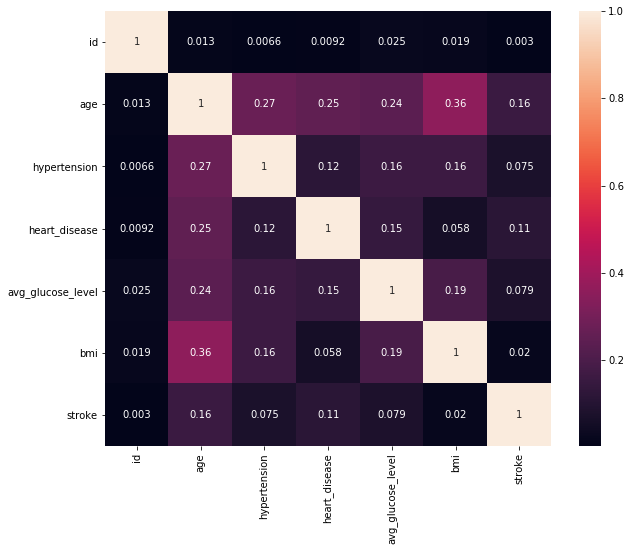

In [497]:
sns.heatmap(train_df.corr(), annot=True)
plt.gcf().set_size_inches(10,8)
plt.show()

In [498]:
# train_df['AgeBand'] = pd.cut(train_df['age'], 10)
# train_df[['AgeBand', 'stroke']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [499]:
# train_df['avg_glucose_level_band'] = pd.cut(train_df['avg_glucose_level'], 4)
# train_df[['avg_glucose_level_band', 'stroke']].groupby(['avg_glucose_level_band'], as_index=False).mean().sort_values(by='avg_glucose_level_band', ascending=True)

In [500]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [501]:
train_df.smoking_status.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [502]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']

In [503]:
del_cols = ['id', 'gender', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']

In [504]:
# train_df.fillna(-1, inplace=True)
# test_df.fillna(-1, inplace=True)

In [505]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train_df[col]) + list(test_df[col]))
    train_df[col] = le.transform(list(train_df[col]))
    test_df[col] = le.transform(list(test_df[col]))

In [506]:
# train_df['smoking_status'] = train_df['smoking_status'].astype(int)
# test_df['smoking_status'] = test_df['smoking_status'].astype(int)

In [507]:
# train_df_objs_num = len(train_df)
# dataset = pd.concat(objs=[train_df, test_df], axis=0)
# dataset = pd.get_dummies(dataset)

In [508]:
# dataset.head()

In [509]:
# train_df = dataset[:train_df_objs_num]
# test_df = dataset[train_df_objs_num:]

In [510]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,2,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [511]:
def bmi_cat(bmi):
    if(bmi < 18.5):
        return 1
    elif (bmi <=24.9):
        return 2
    elif (bmi <=29.9):
        return 3
    else:
        return 4

In [512]:
def age_cat(age):
    if(age < 40):
        return 1
    elif(age<50):
        return 2
    elif(age<60):
        return 3
    elif(age<75):
        return 4
    else:
        return 5

In [513]:
import math
def sugar_cat(sugar):
    if(math.isnan(sugar)):
        return sugar
    elif(sugar < 173):
        return 1
    elif(sugar<232):
        return 2
    else:
        return 3

In [514]:
def is_all_symptom(row):
    if(row.bmi > 30 and row.avg_glucose_level>150):
        return 1
    else:
        return 0

In [515]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,2,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0


In [516]:
train_df['bmi_cat'] = train_df['bmi'].apply(bmi_cat)
test_df['bmi_cat'] = test_df['bmi'].apply(bmi_cat)

train_df['age_cat'] = train_df['age'].apply(bmi_cat)
test_df['age_cat'] = test_df['age'].apply(bmi_cat)

# train_df['is_all_symptom'] = train_df.apply(is_all_symptom, axis=1)
# test_df['is_all_symptom'] = test_df.apply(is_all_symptom, axis=1)

# train_df['smoking_status'] = train_df.apply(impute_smoke, axis=1)
# test_df['smoking_status'] = test_df.apply(impute_smoke, axis=1)

In [517]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_cat', 'age_cat'],
      dtype='object')

In [518]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [519]:
# train_df[np.abs(train_df.bmi-train_df.bmi.mean())<=(7*train_df.bmi.std())] 
# train_df = train_df[~(np.abs(train_df.bmi-train_df.bmi.mean())>(7*train_df.bmi.std()))]

In [520]:
train_df.shape

(43400, 14)

In [521]:
target = train_df['stroke']

In [522]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() # default=(0, 1)
# numerical = ['avg_glucose_level']

# train_df = pd.DataFrame(data = train_df)
# train_df[numerical] = scaler.fit_transform(train_df[numerical])

# test_df = pd.DataFrame(data = test_df)
# test_df[numerical] = scaler.fit_transform(test_df[numerical])

In [523]:
del train_df['id']
del test_df['id']

In [524]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 7, stratify=target)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 34720 samples.
Testing set has 8680 samples.


In [525]:
cat_cols = ['ever_married', 'work_type', 'Residence_type']

In [526]:
for col in cat_cols:
    tmp = X_train.groupby([col]).agg({'stroke' : [np.mean, np.std]}).reset_index()
    tmp.columns = [col, 'mean_stroke_'+ col, 'std_stroke_'+ col]    
    X_train = pd.merge(X_train, tmp, how='left', on=[col]) 
for col in cat_cols:
    tmp = X_test.groupby([col]).agg({'stroke' : [np.mean,  np.std]}).reset_index()
    tmp.columns = [col, 'mean_stroke_'+ col, 'std_stroke_'+ col]    
    X_test = pd.merge(X_test, tmp, how='left', on=[col])     
for col in cat_cols:
    tmp = train_df.groupby([col]).agg({'stroke' : [np.mean,  np.std]}).reset_index()
    tmp.columns = [col, 'mean_stroke_'+ col, 'std_stroke_'+ col]    
    test_df = pd.merge(test_df, tmp, how='left', on=[col])     

In [527]:
del X_train['stroke']
del X_test['stroke']

In [528]:
# from imblearn.combine import SMOTETomek

# sm = SMOTETomek(ratio='auto')
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# # Show the results of the split
# print("Training set has {} samples.".format(X_train_res.shape[0]))
# print("Testing set has {} samples.".format(y_train_res.shape[0]))

In [529]:
# X_train.drop(del_cols, inplace=True, axis=1)
# X_test.drop(del_cols, inplace=True, axis=1)
# test_df.drop(del_cols, inplace=True, axis=1)

In [530]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [531]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer , roc_auc_score, accuracy_score, confusion_matrix

def kFoldCV(clf, parameters, X_train, y_train, X_test, y_test, test): 
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer, verbose=10, cv=3, n_jobs=-1, )
    grid_fit = grid_obj.fit(X_train, y_train)
    best_clf = grid_fit.best_estimator_
#     predictions = best_clf.predict(X_test)
#     print('{} has confusion_matrix: \n{}'.format(clf.__class__.__name__, confusion_matrix(y_test, predictions)))
    best_predictions = best_clf.predict_proba(X_test)[:,1]
    print('best model: ', best_clf)
    print('{} has roc_auc_score: {}'.format(clf.__class__.__name__, roc_auc_score(y_test, best_predictions)))
    preds = best_clf.predict_proba(test)[:,1]
    return preds

In [532]:
def train_predict(clf, X_train, y_train, X_test, y_test, test):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print('{} has confusion_matrix: \n{}'.format(clf.__class__.__name__, confusion_matrix(y_test, preds)))
    preds = clf.predict_proba(X_test)[:,1]
    print('{} has roc_auc_score: {}'.format(clf.__class__.__name__, roc_auc_score(y_test, preds)))
    preds = clf.predict_proba(test)[:,1]
    return preds

In [533]:
# model1 = LGBMClassifier(random_state=7, n_jobs=-1)
# preds1 = train_predict(model1, X_train, y_train, X_test, y_test, test_df)

In [534]:
# model2 = AdaBoostClassifier(random_state=7, n_estimators=100)
# preds2 = train_predict(model2, X_train, y_train, X_test, y_test, test_df)

In [535]:
# model3 = GradientBoostingClassifier(random_state=0)
# preds3 = train_predict(model3, X_train, y_train, X_test, y_test, test_df)

In [536]:
params = {}
params["objective"] = "binary"
params['metric'] = 'auc'
params["max_depth"] = 7
params["min_data_in_leaf"] = 100
params["learning_rate"] = 0.1
params["bagging_fraction"] = 0.7
params["feature_fraction"] = 0.7
params["bagging_freq"] = 5
params["bagging_seed"] = 7
params["verbosity"] = -1
num_rounds = 500

In [537]:
lgtrain = lgb.Dataset(X_train, label=y_train)
lgtest = lgb.Dataset(X_test, label=y_test)

In [538]:
model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=100, verbose_eval=20)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.836477
[40]	valid_0's auc: 0.833928
[60]	valid_0's auc: 0.842681
[80]	valid_0's auc: 0.841364
[100]	valid_0's auc: 0.838285
[120]	valid_0's auc: 0.833976
[140]	valid_0's auc: 0.831125
Early stopping, best iteration is:
[55]	valid_0's auc: 0.843033


In [539]:
preds1 = model.predict(test_df, num_iteration=model.best_iteration)

In [450]:
# params = {'colsample_bytree':[1, 0.9, 0.8, 0.7], 'subsample':[1, 0.9, 0.8, 0.7]}
# model1 = XGBClassifier(random_state=77, n_jobs=-1)
# preds6 = kFoldCV(model1, params, X_train, y_train, X_test, y_test, test_df)

In [451]:
# params = {'subsample_for_bin':[20000, 30000, 10000]}
# model1 = LGBMClassifier(random_state=7,n_jobs=-1, verbose=1, )
# preds1 = kFoldCV(model1, params, X_train, y_train, X_test, y_test, test_df)

In [540]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_seed=7, iterations=500, verbose= True, use_best_model=True, eval_metric='AUC')
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.5445945	test: 0.5562988	best: 0.5562988 (0)	total: 41ms	remaining: 20.4s
1:	learn: 0.7511159	test: 0.7392025	best: 0.7392025 (1)	total: 92.2ms	remaining: 22.9s
2:	learn: 0.7796849	test: 0.7620668	best: 0.7620668 (2)	total: 127ms	remaining: 21.1s
3:	learn: 0.7655506	test: 0.7511492	best: 0.7620668 (2)	total: 162ms	remaining: 20.1s
4:	learn: 0.8007000	test: 0.7762547	best: 0.7762547 (4)	total: 212ms	remaining: 21s
5:	learn: 0.7992166	test: 0.7701996	best: 0.7762547 (4)	total: 261ms	remaining: 21.5s
6:	learn: 0.7977306	test: 0.7604705	best: 0.7762547 (4)	total: 320ms	remaining: 22.6s
7:	learn: 0.8024868	test: 0.7648521	best: 0.7762547 (4)	total: 370ms	remaining: 22.7s
8:	learn: 0.8046801	test: 0.7670944	best: 0.7762547 (4)	total: 414ms	remaining: 22.6s
9:	learn: 0.8055985	test: 0.7642318	best: 0.7762547 (4)	total: 469ms	remaining: 23s
10:	learn: 0.8089872	test: 0.7706988	best: 0.7762547 (4)	total: 530ms	remaining: 23.5s
11:	learn: 0.8310440	test: 0.7803198	best: 0.7803198 (11)

96:	learn: 0.8772853	test: 0.8455890	best: 0.8458252 (95)	total: 4.93s	remaining: 20.5s
97:	learn: 0.8774640	test: 0.8458708	best: 0.8458708 (97)	total: 4.99s	remaining: 20.5s
98:	learn: 0.8775915	test: 0.8459672	best: 0.8459672 (98)	total: 5.05s	remaining: 20.4s
99:	learn: 0.8776684	test: 0.8462624	best: 0.8462624 (99)	total: 5.1s	remaining: 20.4s
100:	learn: 0.8779402	test: 0.8462893	best: 0.8462893 (100)	total: 5.16s	remaining: 20.4s
101:	learn: 0.8779819	test: 0.8462392	best: 0.8462893 (100)	total: 5.22s	remaining: 20.4s
102:	learn: 0.8781178	test: 0.8463289	best: 0.8463289 (102)	total: 5.27s	remaining: 20.3s
103:	learn: 0.8782798	test: 0.8462975	best: 0.8463289 (102)	total: 5.32s	remaining: 20.3s
104:	learn: 0.8784080	test: 0.8465449	best: 0.8465449 (104)	total: 5.38s	remaining: 20.2s
105:	learn: 0.8784972	test: 0.8467526	best: 0.8467526 (105)	total: 5.43s	remaining: 20.2s
106:	learn: 0.8786574	test: 0.8468528	best: 0.8468528 (106)	total: 5.49s	remaining: 20.2s
107:	learn: 0.87874

190:	learn: 0.8889747	test: 0.8480739	best: 0.8481225 (189)	total: 10.1s	remaining: 16.3s
191:	learn: 0.8890560	test: 0.8481942	best: 0.8481942 (191)	total: 10.1s	remaining: 16.3s
192:	learn: 0.8890962	test: 0.8481651	best: 0.8481942 (191)	total: 10.2s	remaining: 16.2s
193:	learn: 0.8891900	test: 0.8482503	best: 0.8482503 (193)	total: 10.2s	remaining: 16.2s
194:	learn: 0.8891976	test: 0.8482555	best: 0.8482555 (194)	total: 10.3s	remaining: 16.1s
195:	learn: 0.8893048	test: 0.8482831	best: 0.8482831 (195)	total: 10.3s	remaining: 16.1s
196:	learn: 0.8895487	test: 0.8483048	best: 0.8483048 (196)	total: 10.4s	remaining: 16s
197:	learn: 0.8897014	test: 0.8481979	best: 0.8483048 (196)	total: 10.5s	remaining: 15.9s
198:	learn: 0.8896989	test: 0.8482009	best: 0.8483048 (196)	total: 10.5s	remaining: 15.9s
199:	learn: 0.8898898	test: 0.8482577	best: 0.8483048 (196)	total: 10.6s	remaining: 15.8s
200:	learn: 0.8900891	test: 0.8481561	best: 0.8483048 (196)	total: 10.6s	remaining: 15.8s
201:	learn: 

285:	learn: 0.8978595	test: 0.8485499	best: 0.8488511 (273)	total: 15s	remaining: 11.3s
286:	learn: 0.8979971	test: 0.8485798	best: 0.8488511 (273)	total: 15.1s	remaining: 11.2s
287:	learn: 0.8980568	test: 0.8485462	best: 0.8488511 (273)	total: 15.1s	remaining: 11.1s
288:	learn: 0.8980880	test: 0.8486411	best: 0.8488511 (273)	total: 15.2s	remaining: 11.1s
289:	learn: 0.8981756	test: 0.8485933	best: 0.8488511 (273)	total: 15.2s	remaining: 11s
290:	learn: 0.8982982	test: 0.8487121	best: 0.8488511 (273)	total: 15.3s	remaining: 11s
291:	learn: 0.8984141	test: 0.8488294	best: 0.8488511 (273)	total: 15.3s	remaining: 10.9s
292:	learn: 0.8985170	test: 0.8488339	best: 0.8488511 (273)	total: 15.4s	remaining: 10.9s
293:	learn: 0.8986108	test: 0.8488989	best: 0.8488989 (293)	total: 15.4s	remaining: 10.8s
294:	learn: 0.8987259	test: 0.8487794	best: 0.8488989 (293)	total: 15.5s	remaining: 10.8s
295:	learn: 0.8987812	test: 0.8487263	best: 0.8488989 (293)	total: 15.6s	remaining: 10.7s
296:	learn: 0.89

381:	learn: 0.9052666	test: 0.8488421	best: 0.8489707 (368)	total: 20s	remaining: 6.19s
382:	learn: 0.9053042	test: 0.8488421	best: 0.8489707 (368)	total: 20.1s	remaining: 6.13s
383:	learn: 0.9053795	test: 0.8487831	best: 0.8489707 (368)	total: 20.1s	remaining: 6.08s
384:	learn: 0.9055285	test: 0.8486501	best: 0.8489707 (368)	total: 20.2s	remaining: 6.03s
385:	learn: 0.9055408	test: 0.8486000	best: 0.8489707 (368)	total: 20.2s	remaining: 5.97s
386:	learn: 0.9056015	test: 0.8486374	best: 0.8489707 (368)	total: 20.3s	remaining: 5.92s
387:	learn: 0.9057313	test: 0.8485245	best: 0.8489707 (368)	total: 20.3s	remaining: 5.87s
388:	learn: 0.9058832	test: 0.8483990	best: 0.8489707 (368)	total: 20.4s	remaining: 5.82s
389:	learn: 0.9059295	test: 0.8484348	best: 0.8489707 (368)	total: 20.4s	remaining: 5.76s
390:	learn: 0.9059807	test: 0.8484132	best: 0.8489707 (368)	total: 20.5s	remaining: 5.71s
391:	learn: 0.9061175	test: 0.8484887	best: 0.8489707 (368)	total: 20.5s	remaining: 5.66s
392:	learn: 

475:	learn: 0.9116393	test: 0.8477608	best: 0.8489707 (368)	total: 25s	remaining: 1.26s
476:	learn: 0.9116850	test: 0.8477451	best: 0.8489707 (368)	total: 25s	remaining: 1.21s
477:	learn: 0.9117291	test: 0.8476479	best: 0.8489707 (368)	total: 25.1s	remaining: 1.15s
478:	learn: 0.9117498	test: 0.8477159	best: 0.8489707 (368)	total: 25.1s	remaining: 1.1s
479:	learn: 0.9118369	test: 0.8477391	best: 0.8489707 (368)	total: 25.2s	remaining: 1.05s
480:	learn: 0.9119442	test: 0.8476726	best: 0.8489707 (368)	total: 25.2s	remaining: 996ms
481:	learn: 0.9120033	test: 0.8476449	best: 0.8489707 (368)	total: 25.3s	remaining: 943ms
482:	learn: 0.9121655	test: 0.8475964	best: 0.8489707 (368)	total: 25.3s	remaining: 891ms
483:	learn: 0.9122372	test: 0.8475605	best: 0.8489707 (368)	total: 25.4s	remaining: 839ms
484:	learn: 0.9123235	test: 0.8475709	best: 0.8489707 (368)	total: 25.4s	remaining: 786ms
485:	learn: 0.9123743	test: 0.8475687	best: 0.8489707 (368)	total: 25.5s	remaining: 734ms
486:	learn: 0.9

In [541]:
preds_cb = model.predict(X_test)
print('{} has confusion_matrix: \n{}'.format(model.__class__.__name__, confusion_matrix(y_test, preds_cb)))
preds_cb = model.predict_proba(X_test)[:,1]
print('{} has roc_auc_score: {}'.format(model.__class__.__name__, roc_auc_score(y_test, preds_cb)))
preds_cb = model.predict_proba(test_df)[:,1]

CatBoostClassifier has confusion_matrix: 
[[8523    0]
 [ 157    0]]
CatBoostClassifier has roc_auc_score: 0.8489706758258471


In [550]:
preds = (preds1*0.55+preds_cb*0.45)

In [551]:
sub = pd.DataFrame()
sub = pd.concat([test_ids, pd.Series(preds)], axis=1)
sub = sub.rename(columns={0:'stroke'})
sub[['stroke']] = sub[['stroke']].apply(pd.to_numeric)
sub.to_csv('sub2.csv', index=False)